In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data

In [12]:
(X_train, y_train) , (X_test, y_test) = load_data()

X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train.shape, type(X_train)

((60000, 28, 28), numpy.ndarray)

In [14]:
X_train[10].min(), X_train[10].max()

(0.0, 0.996078431372549)

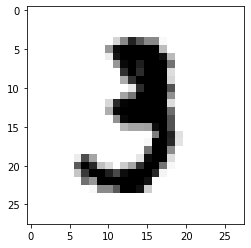

In [15]:
plt.imshow(X_train[10], cmap="gray_r")

In [16]:
y_train[10]

3

In [17]:
set_seed(0)

model = Sequential()

model.add( Flatten(input_shape=(28,28)) ) # adapter danych wejściowych

model.add( Dense(256, activation="relu") )
#model.add( Dropout(0.1))
model.add( Dense(128, activation="relu") )

model.add( Dense(10, activation="softmax") )  # warstwa wyjściowa
model.compile(optimizer="rmsprop", metrics="accuracy", loss="sparse_categorical_crossentropy")
result = model.fit(X_train, y_train, epochs=10, validation_split=0.05)

Epoch 1/10
1782/1782 [==============================] - 9s 4ms/step - loss: 0.2093 - accuracy: 0.9374 - val_loss: 0.0982 - val_accuracy: 0.9723
Epoch 2/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0962 - accuracy: 0.9725 - val_loss: 0.0832 - val_accuracy: 0.9797
Epoch 3/10
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9797 - val_loss: 0.0998 - val_accuracy: 0.9767
Epoch 4/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9842 - val_loss: 0.0973 - val_accuracy: 0.9800
Epoch 5/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9865 - val_loss: 0.0933 - val_accuracy: 0.9807
Epoch 6/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.1444 - val_accuracy: 0.9717
Epoch 7/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9905 - val_loss: 0.1290 - val_accuracy:

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
y_pred = model.predict(X_test)

In [30]:
X_test[:1].shape

(1, 28, 28)

In [33]:
X_test[0].shape, X_test[0].reshape(1,28,28).shape

((28, 28), (1, 28, 28))

In [34]:
model.predict(X_test[:1])

array([[2.6388823e-31, 2.7508059e-23, 8.1595086e-19, 2.9793590e-17,
        2.2846163e-31, 2.1165403e-22, 0.0000000e+00, 1.0000000e+00,
        7.1840607e-26, 7.4932191e-18]], dtype=float32)

In [36]:
y_test[0], np.argmax( model.predict(X_test[:1]), axis=-1)

(7, array([7]))

In [37]:
y_pred = np.argmax( model.predict(X_test), axis=-1)

In [38]:
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,975,1,0,1,1,1,0,1,0,0
1,1,1125,2,2,0,0,2,1,1,1
2,6,1,993,8,4,0,2,9,9,0
3,0,0,1,996,0,3,0,5,2,3
4,2,0,0,0,964,0,5,3,2,6
5,5,1,0,14,1,855,7,2,6,1
6,8,2,0,1,5,4,938,0,0,0
7,1,0,6,1,5,0,0,1008,2,5
8,12,1,5,7,7,5,1,6,926,4
9,3,3,0,1,12,1,0,4,2,983


In [39]:
accuracy_score(y_test, y_pred)

0.9763

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [43]:
y_test[20], np.argmax( model.predict(X_test[20:21]), axis=-1)

(9, array([9]))

In [44]:
# walidacja przesuniętego obrazka
np.set_printoptions(linewidth=160)
arr1 = (X_test[20]*255).astype('int')
arr1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 140, 193,  44,   0

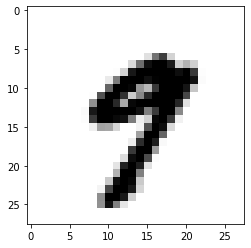

In [46]:
plt.imshow(X_test[20], cmap="gray_r")

In [48]:
np.set_printoptions(linewidth=160)
arr1 = (X_test[20]*255).astype('int')
arr1 = arr1[4:-3, 3:-5]
arr1.shape

(21, 20)

In [49]:
arr2 = np.hstack( [  arr1, np.zeros([21,8]).astype('int')  ] )
arr2 = np.vstack( [  arr2, np.zeros([7,28]).astype('int')  ] )
arr2.shape

(28, 28)

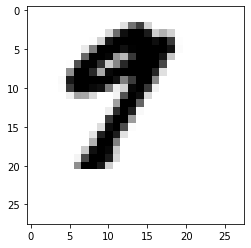

In [50]:
plt.imshow(arr2, cmap="gray_r")

In [55]:
arr3 = (arr2/255).reshape(1,28,28)
np.argmax( model.predict(arr3), axis=-1) 

array([2])

In [56]:
model.predict(arr3)

array([[4.0665290e-19, 1.0045411e-13, 9.9999416e-01, 1.0936292e-16, 0.0000000e+00, 1.7687707e-28, 1.4064094e-29, 2.6008318e-15, 5.7833809e-06, 4.3488975e-31]],
      dtype=float32)

### Zapis / odczyt sieci

In [57]:
from tensorflow.keras.models import model_from_json, load_model

In [58]:
# zapis sieci
model.save("model.h5")
model.save("model/")

INFO:tensorflow:Assets written to: model/assets


In [60]:
model2 = load_model("model/")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [61]:
model2 = load_model("model.h5")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [64]:
# serializacja sieci do JSONa
model_json = model.to_json()
with open("model.json", "wt") as fd:
  fd.write(model_json)
# zapis wag z sieci
model.save_weights("model-wagi.h5")

In [67]:
# deserializacja sieci
with open("model.json","rt") as fd:
  model_json = fd.read()
model3 = model_from_json(model_json)
# załaduj wagi
model3.load_weights("model-wagi.h5")

In [69]:
arr3 = (arr2/255).reshape(1,28,28)
np.argmax( model3.predict(arr3), axis=-1) 

array([2])

In [71]:
# klonowanie sieci
config = model3.get_config()
model4 = Sequential.from_config(config)
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
